<!-- <img src="pics/CFDS.png" width=75px>-->
<img src="pics/DVFA-Akademie_Logo_800px.jpg" width=300px>
<br>
    <p style="color:#0E1E5E">
    <b>
        <font size="6">CFDS® – Chartered Financial Data Scientist</font>
        <br><br>
        <font size="8">Introduction to Python</font>
    </b>
<br><br>
<b>
    <font size="5"> 
        Prof. Dr. Natalie Packham <br><br>
        11 December 2024
    </font>
</b>
</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Statistical-Methods-in-Data-Science" data-toc-modified-id="Statistical-Methods-in-Data-Science-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Statistical Methods in Data Science</a></span><ul class="toc-item"><li><span><a href="#Ridge-regression,-Lasso-and-Elastic-Net" data-toc-modified-id="Ridge-regression,-Lasso-and-Elastic-Net-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ridge regression, Lasso and Elastic Net</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Principal-component-analysis" data-toc-modified-id="Principal-component-analysis-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Principal component analysis</a></span></li></ul></li></ul></div>

# Statistical Methods in Data Science

* In this part, we study a number of statistical methods that have become very popular in Data Science applications: 
* Statistical Learning methods are often classified into: 
  * Regression versus classification
  * Supervised versus unsupervised learning (versus reinforcement learning)
* The methods studied here cover these different aspects: 
  * Ridge regression and Lasso (regression, supervised)
  * Logistic regression (classification, supervised)
  * Principal components analysis (regression, unsupervised)

## Ridge regression, Lasso and Elastic Net

* In linear regression, we assume a linear relationship between the _target_ $Y$ and the feature vector $X$: 

  $Y = a + b_1 X_1 + b_2 X_2 + \cdots + b_m X_m + \epsilon$,
  
  where $a, b_1, \ldots, b_m$ are constants and $\epsilon$ is the error term.
* The ordinary least squares (OLS) estimates of $a,b$ minimise the errors

  $\sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n (Y_i - a - b_1 X_{i1} - b_2 X_{i2} - \cdots - b_m X_{im})^2$. 

* In machine learning, especially when the number of features is high and when features are highly correlated, overfitting can occur. 
* One way of dealing with this is known as __regularisation__. 
* The most popular regularisation methods are: 
  * Ridge regression
  * Lasso
  * Elastic net

### Ridge regression

* In statistics, __ridge regression__  is known as __Tikhonov regularisation__ or __$L_2$ regularisation__. 
* Building on OLS, a term is added to the objective function that places a __penalty__ on the size of the coefficients $b_1, \ldots, b_m$, by minimising:

  $\sum_{i=1}^n (Y_i - a - b_1 X_{i1} - b_2 X_{i2} - \cdots - b_m X_{im})^2 + \lambda \sum_{j=1}^m b_j^2$. 
* The constant $\lambda$ is called __tuning parameter__ or __hyperparameter__ and controls the strength of the penalty factor. 
* The term $\lambda \sum_{j=1}^m b_j^2$ is called the __shrinkage penalty__, as it will shrink the estimates of $b_1, \ldots, b_m$ towards zero. 
* Selecting a good value of $\lambda$ is critial and can be achieved, for example, by __cross-validation__.

### Ridge regression 

* The OLS estimates do not depend on the magnitude of the independent variables: multiplying $X_j$ by a constant $c$ leads to a scaling of the OLS-coefficient by $1/c$. 
* This is different in ridge regression (and Lasso, see below): the estimated coefficients can change substantially when re-scaling independent variables. 
* Therefore, it is custom, to _standardise_ the features: 

  $\tilde x_{ij} = \displaystyle \frac{x_{ij}} {\sqrt{\frac{1}{n} \sum_{i=1}^n (x_{ij}-\overline{x}_j)^2}}$, 

  so that all variables are on the same scale, i.e., they all have a standard deviation of one.
  


### Lasso

* __Lasso (Least absolute shrinkage and selection operator)__, also known as __$L_1$ regularisation__ adds a different penalty: 

  $\sum_{i=1}^n (Y_i - a - b_1 X_{i1} - b_2 X_{i2} - \cdots - b_m X_{im})^2 + \lambda \sum_{j=1}^m |b_j|$. 
* This has the interesting effect that the less relevant features are completely eliminated. 
* For this reason, Lasso is also often used as a feature selection or variable selection method.

### Elastic net regression

* __Elastic net regression__ is a mixture of ridge regression and Lasso: 

  $\sum_{i=1}^n (Y_i - a - b_1 X_{i1} - b_2 X_{i2} - \cdots - b_m X_{im})^2 + \lambda_1 \sum_{j=1}^m b_j^2 +  \lambda_2 \sum_{j=1}^m |b_j|$. 

* Combining the effects of ridge regression and Lasso means that simultaneously
  * some coefficients are reduced to zero (Lasso), 
  * some coefficients are reduced in size (ridge regression).

### Example

* The following application predicts house prices based on different features of the property. 
* The data set is from 

  Hull: Machine Learning in Business. 3rd edition, independently published, 2021. 
  


In [108]:
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import seaborn as sns

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
# The sklearn library has cross-validation built in!
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [109]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('data/Houseprice_data_scaled.csv') 
# data = pd.read_csv('https://raw.githubusercontent.com/packham/Python_CFDS/main/data/Houseprice_data_scaled.csv')

In [110]:
X = data.drop('Sale Price', axis=1)
y = data['Sale Price']

* `sklearn` can split training and testing data randomly. 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
pred = lr.predict(X_test)
mse(y_test, pred)

0.13712723961133336

* Observe how the OLS coefficients are all non-zero. 
* However, some coefficients are negative where a positive coefficient would be expected (e.g. `FullBath`). 
* This is an indication that the model is struggling to fit the large number of features.

In [115]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame([['intercept'] + list(X_train.columns),[lr.intercept_] + lr.coef_.tolist()]).transpose().set_index(0)
coeffs

,1
0,
intercept,682.894934
LotArea,0.114813
OverallQual,0.164816
OverallCond,0.080186
YearBuilt,0.133657
YearRemodAdd,0.079848
BsmtFinSF1,0.162612
BsmtUnfSF,0.033426
TotalBsmtSF,0.086656


* Indeed, some correlations are high, as the heatmap indicates, which may cause multicollinearity and ill-fitting.

<Axes: >

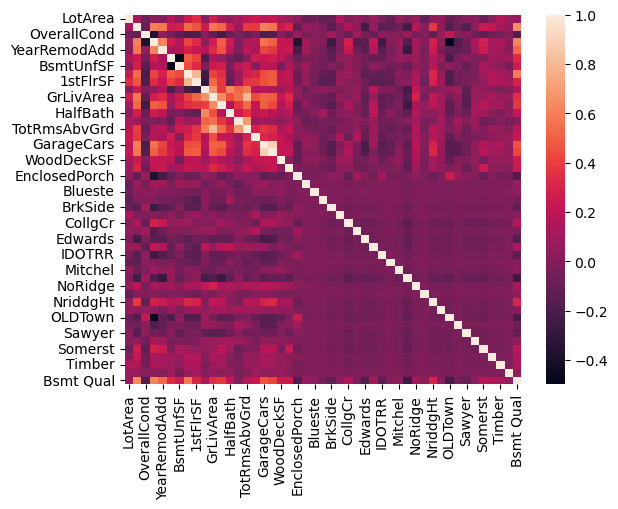

In [116]:
sns.heatmap(X_train.corr())

### Ridge regression

In [117]:
# Importing Ridge
from sklearn.linear_model import Ridge

* Train on the training data set and use  test data set to determine test MSE. 

In [118]:
n=int(len(X)*.75) # choose 75% of data for training
# The alpha used by Python's ridge should be the lambda above times the number of observations
alphas=[0.01*n, 0.02*n, 0.03*n, 0.04*n, 0.05*n, 0.075*n,0.1*n,0.125*n, 0.15*n,0.2*n, 0.4*n]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_test)
    mses.append(mse(y_test,pred))
np.transpose([alphas,mses])

array([[2.18100000e+01, 1.29001697e-01],
       [4.36200000e+01, 1.29171441e-01],
       [6.54300000e+01, 1.29412265e-01],
       [8.72400000e+01, 1.29701057e-01],
       [1.09050000e+02, 1.30024716e-01],
       [1.63575000e+02, 1.30937895e-01],
       [2.18100000e+02, 1.31948838e-01],
       [2.72625000e+02, 1.33023199e-01],
       [3.27150000e+02, 1.34142520e-01],
       [4.36200000e+02, 1.36475377e-01],
       [8.72400000e+02, 1.46457116e-01]])

* This is how to use cross-validation; just specify the number of folds (`cv`) and MSE as the `scoring` function: 

In [119]:
# The alpha used by Python's ridge should be the lambda above times the number of observations
alphas=[0.01*n, 0.02*n, 0.03*n, 0.04*n, 0.05*n, 0.075*n,0.1*n,0.125*n, 0.15*n,0.2*n, 0.4*n]
mses=[]
for alpha in alphas:
    scores = cross_val_score(Ridge(alpha=alpha), X, y, cv=4, scoring="neg_root_mean_squared_error")**2
    mses.append(np.mean(scores))
np.transpose([alphas, mses])

array([[2.18100000e+01, 1.26072955e-01],
       [4.36200000e+01, 1.25090300e-01],
       [6.54300000e+01, 1.24357703e-01],
       [8.72400000e+01, 1.23813646e-01],
       [1.09050000e+02, 1.23415280e-01],
       [1.63575000e+02, 1.22874220e-01],
       [2.18100000e+02, 1.22768312e-01],
       [2.72625000e+02, 1.22938588e-01],
       [3.27150000e+02, 1.23294205e-01],
       [4.36200000e+02, 1.24359345e-01],
       [8.72400000e+02, 1.30590776e-01]])

* Average test MSE varies with the hyperparameter $\alpha$. 
* The best model choice is at approximately $0.1\cdot n = 218$. 

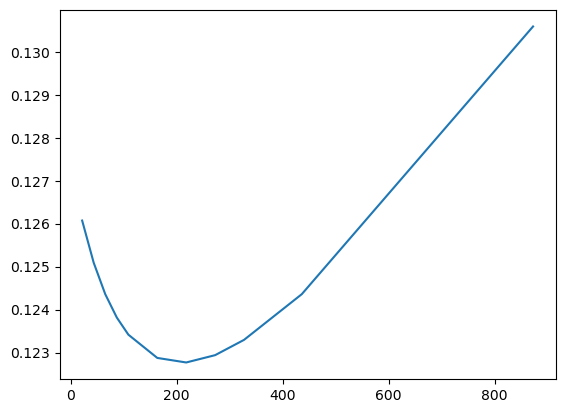

In [120]:
plt.plot(alphas, mses)

### Lasso

In [121]:
# Import Lasso
from sklearn.linear_model import Lasso

In [122]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

* As Lasso acts as a variable selection method we would expect some coefficients to be set to zero:

In [123]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        [lasso.intercept_] + lasso.coef_.tolist()
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,0.012617
LotArea,0.033435
OverallQual,0.297123
OverallCond,0.0
YearBuilt,0.036746
YearRemodAdd,0.073493
BsmtFinSF1,0.105878
BsmtUnfSF,-0.0
TotalBsmtSF,0.058556


* Now, let's find again the parameter with minimal average test MSE:

In [124]:

# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.0025/2, 0.005/2, 0.01/2, 0.015/2, 0.02/2, 0.025/2, 0.03/2, 0.04/2, 0.05/2]
mses=[]
for alpha in alphas:
    scores = cross_val_score(Lasso(alpha=alpha), X, y, cv=4, scoring="neg_root_mean_squared_error")**2
    mses.append(np.mean(scores))    
np.transpose([alphas,mses])

array([[0.00125   , 0.12656815],
       [0.0025    , 0.12603159],
       [0.005     , 0.12546105],
       [0.0075    , 0.12537868],
       [0.01      , 0.12550453],
       [0.0125    , 0.1258581 ],
       [0.015     , 0.12642408],
       [0.02      , 0.12812146],
       [0.025     , 0.13074985]])

* The optimal parameter is at $\alpha=0.0075$:

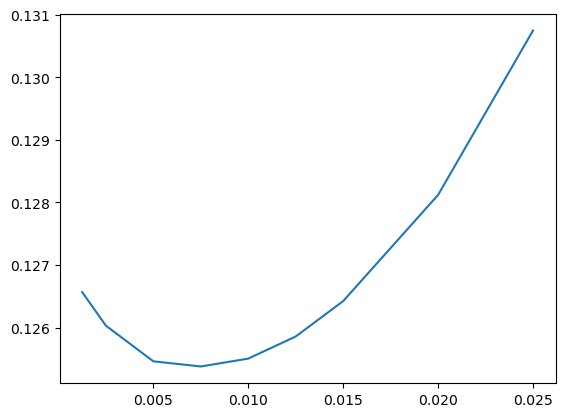

In [125]:
plt.plot(alphas, mses)

## Logistic regression

* In a regression setting, numerical variables are predicted. 
* Another application is classification, which is about predicting the category a new observation belongs to. 
* In supervised learning, and with two categories, a variation of regression, called __logistic regression__ can be used. 
* Given features $X_1, \ldots, X_m$, suppose there are two classes to which observations can belong. 
* An example is the prediction of a loan's default risk, given characteristics of the creditor such as age, education, marital status, etc. 
* Another example is the classification of e-mails into junk or non-junk e-mails.

### Logistic regression

* Logistic regression can be used to calculate the probability of a positive outcome via the __sigmoid function__ 

  $P(Y=1|X) = \displaystyle \frac{1}{1+\mathrm{e}^{-X}} = \frac{\mathrm{e}^{X}}{1+\mathrm{e}^X}$,
  
  where $\mathrm{e}$ is the Euler constant. 

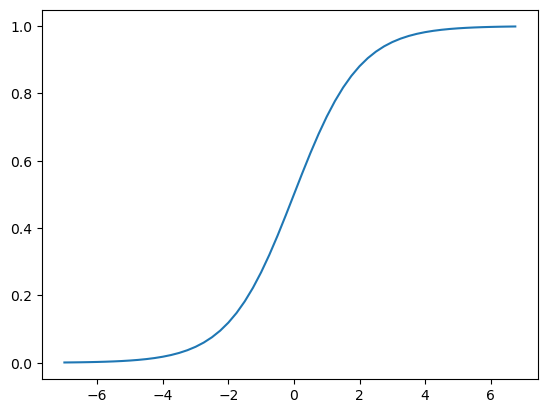

In [126]:
x=np.arange(-7,7,0.25)
plt.plot(x, 1/(1+np.exp(-x)))

### Logistic regression

* Setting $X=a + b_1 X_1 + b_2 X_2 + \cdots + b_m X_m$, the probability of a positive outcome is 

  $P(Y=1|X_1,\ldots, X_m) = \displaystyle \frac{1}{1+\textrm{exp}(-a - \sum_{j=1}^m b_j X_j)}$. 
  
* The objective is to find the coefficients $a, b_1, \ldots, b_m$ that best classify the given data. 
* __Maximum likelihood__ is a versatile method for this type of problem, when OLS does not apply. 
* Without going into detail, the __log likelihood function__ is given as 

  $\ell(a, b_1, \ldots, b_m|x_1, \ldots, x_n) = \sum_{k:y_k=1} \ln (p(x_k)) + \sum_{k: y_k=0} \ln (1-p(x_k))$,
  
  and the parameters are chosen that maximise this function. 

* (Note: The likelihood function is derived by considering the observations to be independent outcomes of a Bernoulli random variable.)

### Example: Credit risk

* The dataset in this example is taken from James et al.: An Introduction to Statistical Learning. Springer, 2013.

* It contains simulated data of defaults on credit card payments, on the basis of credit card balance (amongst other things).

* An excellent tutorial and examples on logistic regression in Python is available here: https://realpython.com/logistic-regression-python/.

* We will use the `sklearn` package below. Logistic regression can also be performed with the `statsmodels.api`, in which case $p$-values and other statistics are calculated.

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [128]:
data = pd.read_csv("./data/Default_JamesEtAl.csv")
# data = pd.read_csv("https://raw.githubusercontent.com/packham/Python_CFDS/main/data/Default_JamesEtAl.csv")

In [129]:
x=np.array(data["balance"]).reshape(-1,1) # array must be two-dimensional
y=np.array([True if x=="Yes" else False for x in data["default"]]) # list comprehension

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [130]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [131]:
# fitted parameters
a=model.intercept_[0]
b=model.coef_[0,0]
[a,b]

[-8.537515117344613, 0.0041960838665424886]

* Scatter plot of data and fitted logistic function:

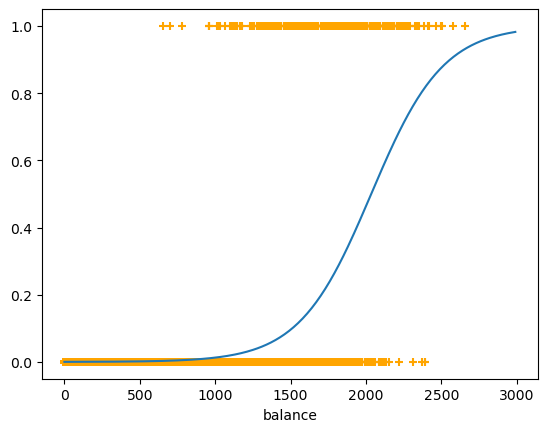

In [132]:
plt.scatter(x,y,c='orange', marker="+")
plt.xlabel('balance')
xrange=range(0,3000,10)
plt.plot(xrange,1/(1+np.exp(-a-b *xrange)))

* Predictions:

In [133]:
model.predict_proba(x_train)[:5]

array([[0.98633215, 0.01366785],
       [0.98600606, 0.01399394],
       [0.98133591, 0.01866409],
       [0.998236  , 0.001764  ],
       [0.99643573, 0.00356427]])

In [134]:
model.predict(x_train)[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

* Mean accuracy of the model:

In [135]:
[model.score(x_train,y_train), model.score(x_test,y_test)]

[0.972875, 0.968]

* Confusion matrix: 

<center>
<img src="pics/confusionMatrix.png" width=300px>
    </center>
    <div align="right" style="font-size:14px">https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec</div>


In [136]:
confusion_matrix(y_train,model.predict(x_train))

array([[7726,   15],
       [ 202,   57]])

In [137]:
confusion_matrix(y_test,model.predict(x_test))

array([[1923,    3],
       [  61,   13]])

* See link below for an explanation of the metrics:

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [138]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      7741
        True       0.79      0.22      0.34       259

    accuracy                           0.97      8000
   macro avg       0.88      0.61      0.67      8000
weighted avg       0.97      0.97      0.97      8000



In [139]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1926
        True       0.81      0.18      0.29        74

    accuracy                           0.97      2000
   macro avg       0.89      0.59      0.64      2000
weighted avg       0.96      0.97      0.96      2000



## Principal component analysis

* __Principal Component Analysis (PCA)__ summarises a large set of correlated variables by smaller number of representative variables that explain most of the variability of the original data set.
* It is a standard method for reducing the dimension of high dimensional, highly correlated systems.
* The principal components are common factors that are unobservable (latent) and directly estimated from the data. 
* While being explanatory in a statistical sense, the factors do not necessarily have an economic interpretation. 

### PCA

<center>
    <table><tr>
        <td><img src="pics/pcaexample.png" width=500px></td>
        <td><img src="pics/pca3.png" width=500px></td> 
        </tr>
    </table>
</center>

### PCA

* The objective is to take $p$ random variables $X_1, X_2, \ldots, X_p$ and find (linear) combinations of these to produce random variables $Z_1, \ldots, Z_p$, the __principal components__, that are uncorrelated. 
* Geometrically, expressing $X_1,\ldots, X_p$ through linear combinations $Z_1,\ldots, Z_p$ can be thought of as shifting and rotating the axes of the coordinate system (see left graph). 
* Hence, the transform leaves the data points unchanged, but expresses them using different coordinates. 
* The lack of correlation is a useful property because it means that the principal components are measuring different "dimensions" of the data. 
* The principal components can be ordered according to their variance, that is, $\text{Var}(Z_1)\geq \text{Var}(Z_2)\geq \cdots \geq \text{Var}(Z_p)$. 
* If the variance captured in the higher dimensions is sufficiently small, then discarding those higher dimensions will retain most of the variability, so only little information is lost. 

### PCA

* Let $(X, Y)$ be are standard normally distributed random variables with a correlation of $0.7$. 
* The left graph above shows a scatterplot of a sample of 100 random numbers $(x_1, y_1), \ldots, (x_{100},  y_{100})$. 
* By shifting and rotating the axes, new variables $Z_1, Z_2$, the principal components, with $Z_i=a_i X + b_i Y$ are obtained. 
* The data sample expressed in terms of $Z_1, Z_2$ is uncorrelated.
* Also, the variance of the data contribution from the first principal component $Z_1$ is much greater than the variance contribution from the second principal component.
* The graph on the right shows the data points when the data are onto the first principal component, discarding the second dimensions. 

### PCA

* The sample variance of $(x_1, \ldots, x_n)$ is $0.9244$ and the sample variance of $(y_1, \ldots, y_n)$ is $0.9226$, whereas the sample variance of the data in the first principal component is $1.6014$ and of the second principal component is $0.2456$. 
* In other words, while the original axes each account for roughly $50\%$ of the total variance, the first principal component accounts for $87\%$ of the sample variance.
* Neglecting the second principal component and expressing the data in the first principal component only retains $87\%$ of the variance (see right graph. 
* In practice, the number of dimensions will be higher, and one will choose the number of principal components to reflect a certain variance contribution such as $99\%$.
* If the data are sufficiently correlated, then only few dimensions (principal components) will be required even for high-dimensional data. 

### PCA example for interest rate term structure

* Interest rates of different maturities are known to exhibit large correlations. 
* Interest rate term structures are therefore a good candidate for a representation by a few factors only. 
* What do you think are the main ways in which an interest term structure moves over time?
* The data below is taken from 

  Hull: Machine Learning in Business. 3rd edition, independently published, 2021. 

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

In [141]:
data=pd.read_excel("./data/Treasuries_Hull.xlsx", index_col=0, parse_dates=True)
#data=pd.read_excelI"https://raw.githubusercontent.com/packham/Python_CFDS/main/data/Treasuries_Hull.xlsx", index_col=0, parse_dates=True)
data.head()

,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
2010-01-04,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


* Our interest lies in movements of interest rate term structures, therefore we take first differences of the data.

In [142]:
d=100*data.diff();
d.dropna(inplace=True)
d.head()

,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
2010-01-05,-4.0,-8.0,-9.0,-9.0,-8.0,-8.0,-6.0,-6.0
2010-01-06,-1.0,0.0,3.0,4.0,5.0,8.0,9.0,11.0
2010-01-07,0.0,2.0,2.0,2.0,0.0,0.0,-1.0,-1.0
2010-01-08,-3.0,-7.0,-6.0,-5.0,-2.0,-2.0,-1.0,1.0
2010-01-11,-2.0,-1.0,-1.0,1.0,1.0,2.0,3.0,4.0


* Correlations of term structure movements:

<Axes: >

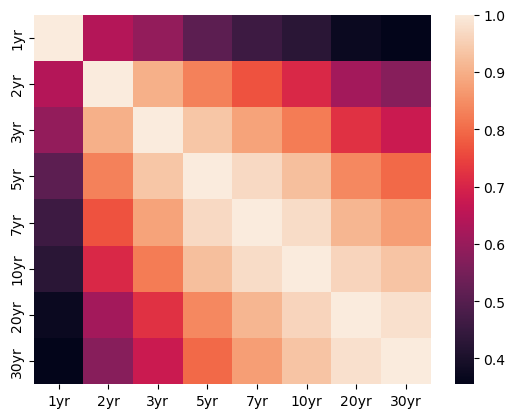

In [143]:
sns.heatmap(d.corr())

* The principal components are the eigenvectors of the correlation matrix.
* These are also called factor loadings. They express the "weight" of each factor for each maturity. 

In [144]:
w, vr=linalg.eig(d.corr()) # eigenvalues, eigenvectors

* The first PC captures changes in the level the term structure. 
* The second PC captures changes in the slope. 
* The third PC can be interpreted as a hump in the term structure.

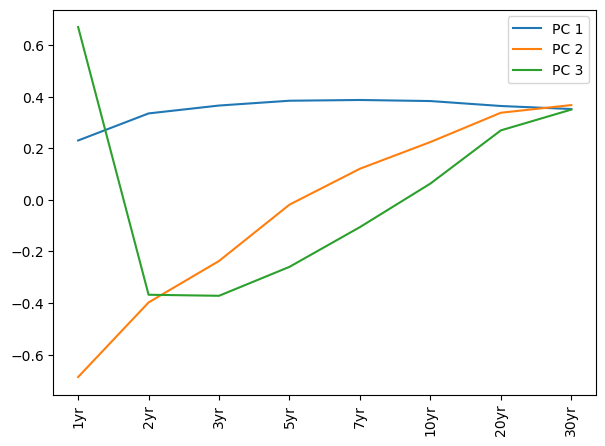

In [145]:
plt.figure(figsize=(7,5))
plt.xticks(range(len(d.columns)), d.columns, rotation='vertical')
plt.plot(np.real(vr[:,0:3])); # first factor loadings
plt.legend(["PC 1", "PC 2", "PC 3"])

* The eigenvalues express the variance captured by each PC.

In [146]:
np.real(100*w/w.sum()) # percentage variances

array([79.2785935 , 12.44724531,  5.31159001,  1.67939721,  0.66881407,
        0.26405994,  0.18916142,  0.16113855])

* The principal component scores are the original data expressed in the PC coordinate system, dimension by dimension. 
* These are obtained by multiplying each PC vector with the original data (de-meaned). 
* Since the principal components are determined from maximising the variance explained by the model, this can be used to interpret the principal components. 
* The correlation of each score with the original data allow for an interpretation of what each principal component represents.

In [147]:
pc1 = np.transpose(vr[:,0]*(d-d.mean())).sum()
pc2 = np.transpose(vr[:,1]*(d-d.mean())).sum()
pc3 = np.transpose(vr[:,2]*(d-d.mean())).sum()
pc4 = np.transpose(vr[:,3]*(d-d.mean())).sum()
pc5 = np.transpose(vr[:,4]*(d-d.mean())).sum()

* This gives the same result: 

In [148]:
pc = np.transpose(np.matmul(np.transpose(vr), np.transpose(d.values-d.values.mean())))

In [149]:
for i in range(5):
    d.insert(i, 'pc' + str(i), pc[:,i])

* The plot below shows the correlations of each interest rate with the first five PC's. 
* Note how the interpretation is similar to the factor loadings above.

<Axes: >

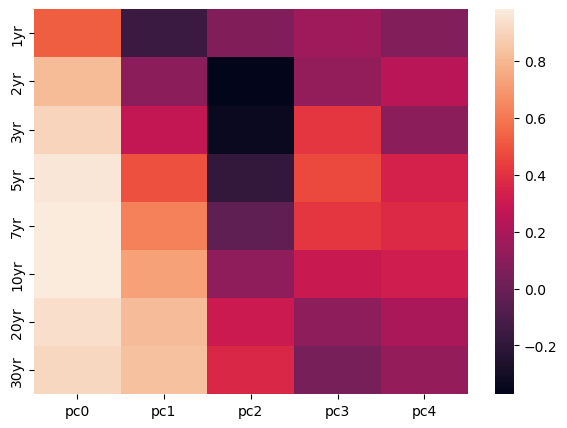

In [150]:
plt.figure(figsize=(7,5))
sns.heatmap(np.transpose(d.corr().head(5)).iloc[5:])